In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from utils import load_data
from utils import load_config


%matplotlib inline
load_config("../../config/matplotlib_config.yaml")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


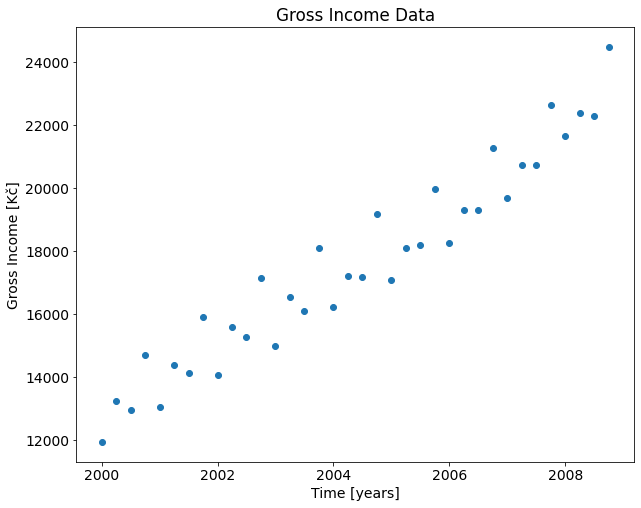

In [219]:
# load data
gross_income_path = "../data/mzdy.txt"
data_income = load_data(gross_income_path)
time = data_income[:, 0]
gross_income = data_income[:, 1]

# visualize data
plt.scatter(time, gross_income)
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Data')
plt.show()

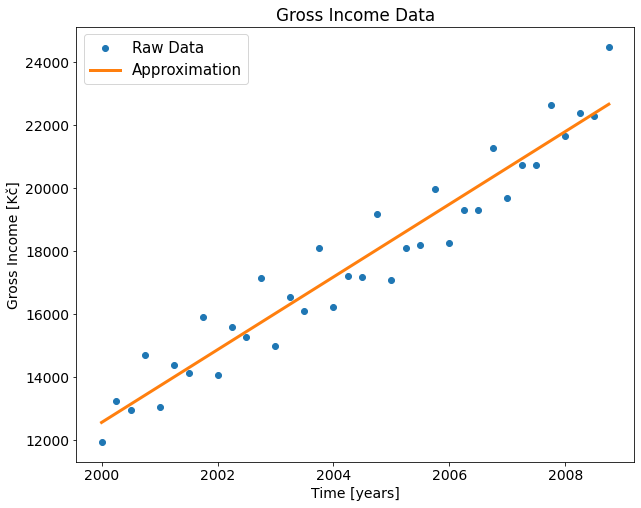

In [220]:
def affine_function(t, x_0, x_1):
    return x_0 + x_1*t

x_0, x_1 = optimize.curve_fit(affine_function, xdata=time, ydata=gross_income)[0]

# visualize approximation
plt.figure()
plt.scatter(time, gross_income, color='tab:blue', label="Raw Data")
plt.plot(time, affine_function(time, x_0, x_1), color='tab:orange', label="Approximation")
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Data')
plt.legend()
plt.show()

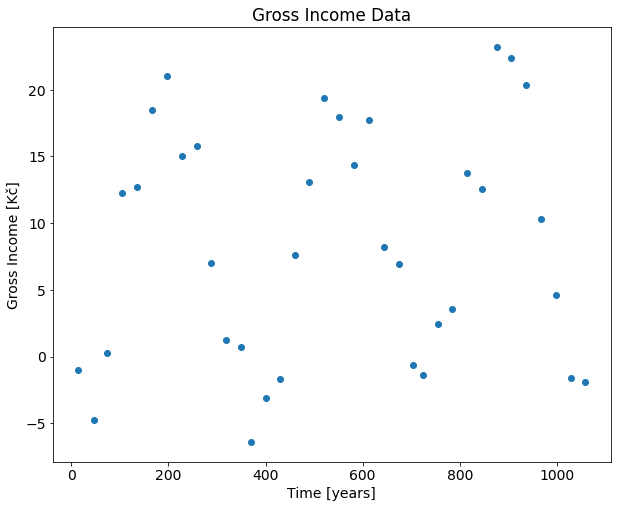

In [221]:
# load data
temperature_path = "../data/teplota.txt"
data_temperature = load_data(temperature_path)
time = data_temperature[:, 0]
temperature = data_temperature[:, 1]

# visualize data
plt.scatter(time, temperature)
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Data')
plt.savefig("../figures/gross_income.svg")
plt.show()

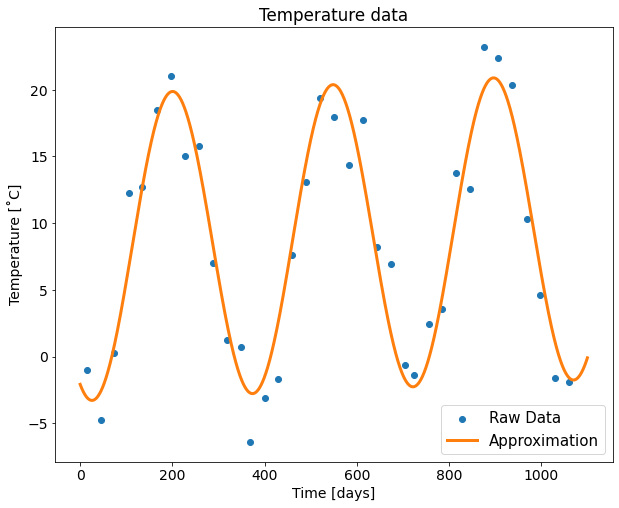

In [222]:
def harmonic_function(t, omega, x_0, x_1, x_2, x_3):
    return x_0 + x_1*t + x_2*np.sin(omega*t) + x_3*np.cos(omega*t)

omega, x_0, x_1, x_2, x_3 = optimize.curve_fit(harmonic_function, xdata=time, ydata=temperature, method='lm', p0=[0.001, 5, 1, 10, 10])[0]
t = np.linspace(0, 1100, num=10000)

# visualize approximation
plt.figure()
plt.scatter(time, temperature, color='tab:blue', label="Raw Data")
plt.plot(t, harmonic_function(t, omega, x_0, x_1, x_2, x_3), color='tab:orange', label="Approximation")
plt.xlabel('Time [days]')
plt.ylabel('Temperature [˚C]')
plt.title('Temperature data')
plt.legend()
plt.savefig("../figures/temperature.svg")
plt.show()